In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
train = pd.read_csv('../data/train/train.csv')

# weekly total orders

In [25]:
weekly_orders = train.groupby('week',as_index=False)['num_orders'].sum()
weekly_orders.rename(columns={'num_orders':'total_orders'},inplace=True)
weekly_orders.tail()

,week,total_orders
140,141,776240
141,142,739661
142,143,759926
143,144,801197
144,145,671926


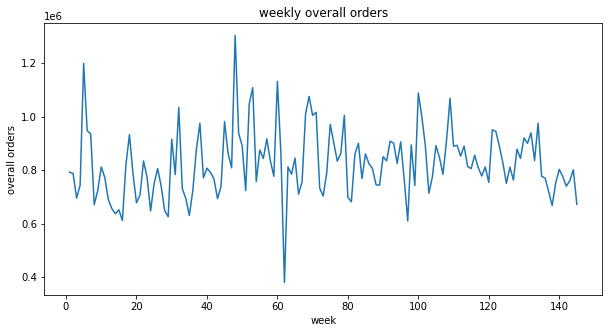

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('week')
ax.set_ylabel('overall orders')
ax.set_title('weekly overall orders')
ax.plot(weekly_orders['week'],weekly_orders['total_orders'])

# center/meal combinations occurences

In [27]:
center_meal_counts = train.groupby(['center_id','meal_id'],as_index=False)['num_orders'].count()
center_meal_counts

,center_id,meal_id,num_orders
0,10,1062,145
1,10,1109,145
2,10,1198,145
3,10,1207,144
4,10,1216,143
...,...,...,...
3592,186,2707,145
3593,186,2760,141
3594,186,2826,143
3595,186,2867,99


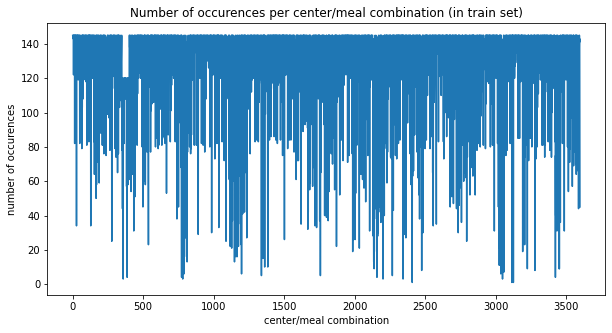

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('center/meal combination')
ax.set_ylabel('number of occurences')
ax.set_title('Number of occurences per center/meal combination (in train set)')
ax.plot(center_meal_counts.index,center_meal_counts['num_orders'])

We can see in the plot above that the number of occurences fluctuates over the unique center/meal combinations. Note that there are about 3600 possible combinations (77 centers and 51 meals).

# weekly coverage of total center/meal combinations

In [29]:
weekly_center_meal_combinations = train.groupby('week',as_index=False)['num_orders'].count()
weekly_center_meal_combinations.rename(columns={'num_orders':'center_meal_combinations'},inplace=True)
weekly_center_meal_combinations

,week,center_meal_combinations
0,1,2922
1,2,2896
2,3,2899
3,4,2889
4,5,2859
...,...,...
140,141,3263
141,142,3238
142,143,3305
143,144,3302


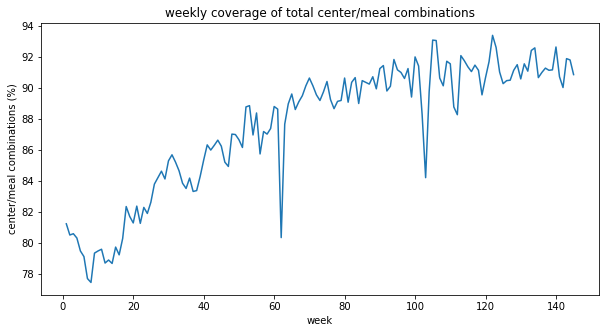

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('week')
ax.set_ylabel('center/meal combinations (%)')
ax.set_title('weekly coverage of total center/meal combinations')
ax.plot(weekly_center_meal_combinations['week'],weekly_center_meal_combinations['center_meal_combinations']/3597*100)

We can see in the plot above that we have an upward trend in the weekly coverage of total center/meal combinations. 